# Expense Analyzer

- Date : 01/02/2020
- Author : Aditya Warnulkar (adwarnulkar@gmail.com)

In [22]:
# expense from finance app
expenses_file = 'C://Users//Aditya//workspace//finance_modeling//notebooks//expenses_february_2021.xls' # Expense report from Toshl finance

# budget allocation for this month
budget_file = 'C://Users//Aditya//workspace//finance_modeling//notebooks//budget_february_2021.csv' # Budget file as per your standard of living

# 401k , HSA , ESPP contribution
company_deductions = 1413.93 + 1419.66

# Gross - TAX - company deductions
salary = (5601.7-1799.94) + (5601.7-1799.95) - company_deductions # Take home salary (After TAX/ESPP/HSA/401K)

In [23]:
salary

4769.92

In [24]:
company_deductions

2833.59

In [25]:
import sys
import os
import re

import pandas as pd
import numpy as np

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import output_notebook , show
output_notebook()

SYS_PATH = 'C:\\Users\\Aditya\\workspace\\finance_modeling\\'
if SYS_PATH not in sys.path:
    sys.path.append(SYS_PATH)

from src import finance_post_process as fin

Loading BokehJS ...

In [26]:
df_expense = pd.read_excel(expenses_file,skiprows=1)
df_expense.head()

,Date,Account,Category,Tags,Amount,Currency,In main currency,Main currency,Description
0,2/2/21,Cash,Office Lunch,NaN,11.93,USD,11.93,USD,CAVA
1,2/3/21,Cash,Shopping,NaN,67.87,USD,67.87,USD,COOFANDY Men Suit Jacket (Dark Grey)
2,2/3/21,Cash,Home & Utilities,NaN,25.00,USD,25.00,USD,Spectrum Internet
3,2/3/21,Cash,Shopping,NaN,16.15,USD,16.15,USD,Photo Frame
4,2/4/21,Cash,Office Lunch,NaN,16.90,USD,16.90,USD,Siam Nara


In [27]:
df_budget = pd.read_csv(budget_file)
df_budget.set_index('Category',inplace=True)

In [28]:
df_expense = df_expense.groupby('Category').sum()['Amount']

In [29]:
df_expense = pd.concat([df_budget,df_expense],axis=1,sort=False)
df_expense.fillna(0,inplace=True)
df_expense['leverage'] = df_expense['budget'] - df_expense['Amount']
df_expense['leverage_perc'] = 100 * df_expense['leverage'] / df_expense['budget']
df_expense = df_expense.replace([np.inf, -np.inf], np.nan)
df_expense.fillna(0,inplace=True)
df_expense

,budget,Amount,leverage,leverage_perc
Home & Utilities,1565,1543.82,21.18,1.353355
Office Lunch,200,82.06,117.94,58.970000
Grocery,250,85.94,164.06,65.624000
Food & Drinks,230,246.94,-16.94,-7.365217
Bills,150,108.70,41.30,27.533333
Car,143,88.00,55.00,38.461538
Shopping,100,467.79,-367.79,-367.790000
Fuel,130,39.21,90.79,69.838462
Gifts,50,10.77,39.23,78.460000


In [30]:
print(f"Monthly Expenditure : ${df_expense.Amount.sum():.2f}")

Monthly Expenditure : $2673.23


In [31]:
print(f"Total Leverage : ${df_expense.leverage.sum():.2f}")

Total Leverage : $144.77


## Plotting
- https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html

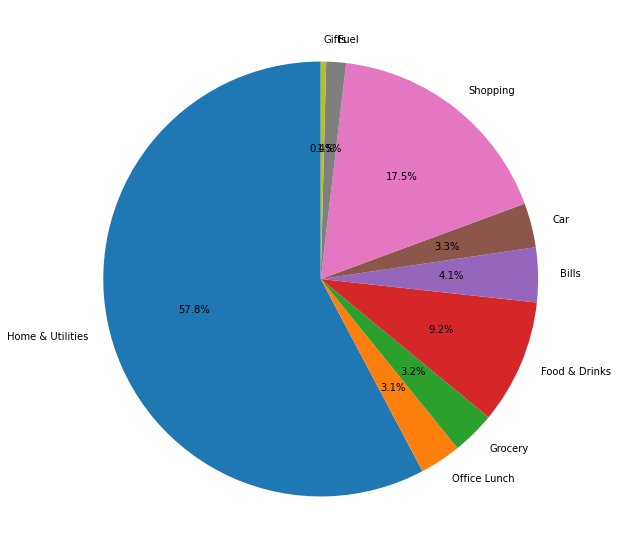

In [32]:
plt.figure(figsize=[10,10])
_ = plt.pie(df_expense.Amount,labels=df_expense.index,shadow=False, startangle=90,autopct='%1.1f%%')

In [33]:
show(fin.plot_expense(df_expense))

# Amount available for investment

In [34]:
salary_take_home = salary
salary_take_home

4769.92

In [35]:
print(f"Total Leverage : ${df_expense.leverage.sum():.2f}")

Total Leverage : $144.77


In [36]:
storage = salary_take_home - df_expense.Amount.sum()
guilt_free_money = 0.1*storage
storage = storage - guilt_free_money
invest_perc = 100*storage/salary_take_home

print(f"Amount available for guilt free expenditure : ${guilt_free_money:.2f}")
print(f"Amount available for investment : ${storage:.2f} {invest_perc:.2f}%")

Amount available for guilt free expenditure : $209.67
Amount available for investment : $1887.02 39.56%


In [37]:
df_goal = pd.read_csv("model_goal_allocation.csv",index_col='goal',usecols=['goal','model_investment'])
df_goal['asset_ratio'] = df_goal.model_investment / df_goal.model_investment.sum()
df_goal['actual_investment'] = df_goal.asset_ratio * storage
df_goal['delta'] = df_goal.actual_investment - df_goal.model_investment
df_goal

,model_investment,asset_ratio,actual_investment,delta
goal,,,,
home,1550.693801,0.507803,958.234610,-592.459191
vacation,234.204323,0.076694,144.724050,-89.480272
wedding,377.733955,0.123696,233.416648,-144.317307
retirement,891.100000,0.291807,550.645692,-340.454308


In [38]:
df_report = pd.concat([df_expense.Amount,df_goal.actual_investment])

In [39]:
df_report = df_report.append(pd.Series([guilt_free_money],index=['Guilt Free']))

In [40]:
df_report = df_report.to_frame(name='value')
df_report['percentage'] = 100*df_report.value/df_report.value.sum()
df_report["model_value"] = pd.concat([df_expense.budget , df_goal.model_investment])
df_report.fillna(0,inplace=True)
df_report

,value,percentage,model_value
Home & Utilities,1543.820000,32.365742,1565.000000
Office Lunch,82.060000,1.720364,200.000000
Grocery,85.940000,1.801707,250.000000
Food & Drinks,246.940000,5.177026,230.000000
Bills,108.700000,2.278864,150.000000
Car,88.000000,1.844895,143.000000
Shopping,467.790000,9.807083,100.000000
Fuel,39.210000,0.822026,130.000000
Gifts,10.770000,0.225790,50.000000
home,958.234610,20.089113,1550.693801


In [41]:
df_report.sum()

value          4769.920000
percentage      100.000000
model_value    5871.732079
dtype: float64

In [42]:
df_report.to_csv('C://Users//Aditya//workspace//finance_modeling//notebooks//report_february_2021.csv')